# Algoritmos No Supervisados

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Análisis por costo de cajas y cantidad de cajas distribuidas

In [15]:
archivo = '/content/drive/MyDrive/Colab Notebooks/M4_Python_David/datos_transporte.xlsx'
df = pd.read_excel(archivo, sheet_name='datos_embarque_2')
df.head(5)

,Origen,Cliente,Estado,Población,N_Cliente,Cajas,Ruta,Costo_caja,Longitud,Latitud
0,Cuatitlán,McD PEDREGAL (CDMX),Ciudad de México,Alvaro Obregón,300000,424,253,3.481940,-99.211035,19.306881
1,Cuatitlán,McD MARIANO OTERO (Gdl. Jal),Jalisco,Guadalajara,300004,335,527,15.849010,-103.398752,20.650664
2,Cuatitlán,McD ZONA ROSA (CDMX),Ciudad de México,Cuauhtémoc,300006,264,466,3.969412,-99.163782,19.426098
3,Cuatitlán,McD PARQUE HUNDIDO (CDMX),Ciudad de México,Benito Juárez,300007,601,563,3.988180,-99.176940,19.379423
4,Cuatitlán,McD INTERLOMAS (EM),Estado de México,Huixquilucan,300008,374,270,3.015192,-99.269409,19.400598


In [ ]:
df.info()

In [5]:
df.shape

(2104, 10)

In [17]:
df.drop(["Origen", "N_Cliente"], axis="columns", inplace=True)


In [18]:
categorical_col = []
for column in df.columns:
  if df[column].dtype == object and len(df[column].unique()) > 5:
    categorical_col.append(column)

In [19]:
categorical_col

['Cliente', 'Estado ', 'Población ']

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
for column in categorical_col:
  df[column] = le.fit_transform(df[column])

In [22]:
df.head()

,Cliente,Estado,Población,Cajas,Ruta,Costo_caja,Longitud,Latitud
0,1966,4,9,424,253,3.481940,-99.211035,19.306881
1,1920,11,86,335,527,15.849010,-103.398752,20.650664
2,2093,4,61,264,466,3.969412,-99.163782,19.426098
3,1959,4,22,601,563,3.988180,-99.176940,19.379423
4,1895,7,99,374,270,3.015192,-99.269409,19.400598


In [26]:
X = df
X

,Cliente,Estado,Población,Cajas,Ruta,Costo_caja,Longitud,Latitud
0,1966,4,9,424,253,3.481940,-99.211035,19.306881
1,1920,11,86,335,527,15.849010,-103.398752,20.650664
2,2093,4,61,264,466,3.969412,-99.163782,19.426098
3,1959,4,22,601,563,3.988180,-99.176940,19.379423
4,1895,7,99,374,270,3.015192,-99.269409,19.400598
...,...,...,...,...,...,...,...,...
2099,1733,4,92,253,570,4.660870,-99.078367,19.493738
2100,1751,7,126,367,568,5.839847,-98.989423,19.363605
2101,1755,7,251,241,375,7.698384,-98.944715,19.277911
2102,1753,7,221,271,354,7.115672,-98.885799,19.518460


## K-Medias

In [ ]:
## Cuatro clases

In [27]:
K = 4

In [28]:
kmeans = KMeans(n_clusters=4, init="random", n_init=10, max_iter=300, algorithm="elkan")

In [29]:
kmeans.fit(X)

KMeans(algorithm='elkan', init='random', n_clusters=4)

In [31]:
y_pred = kmeans.predict(X)

In [32]:
X["Group"] = y_pred

In [33]:
X.head()

,Cliente,Estado,Población,Cajas,Ruta,Costo_caja,Longitud,Latitud,Group
0,1966,4,9,424,253,3.481940,-99.211035,19.306881,2
1,1920,11,86,335,527,15.849010,-103.398752,20.650664,2
2,2093,4,61,264,466,3.969412,-99.163782,19.426098,2
3,1959,4,22,601,563,3.988180,-99.176940,19.379423,2
4,1895,7,99,374,270,3.015192,-99.269409,19.400598,2


In [34]:
X["Group"].unique

<bound method Series.unique of 0       2
1       2
2       2
3       2
4       2
       ..
2099    2
2100    2
2101    2
2102    2
2103    2
Name: Group, Length: 2104, dtype: int32>

In [59]:
group_0 = X[X["Group"] == 0]
group_1 = X[X["Group"] == 1]
group_2 = X[X["Group"] == 2]
group_3 = X[X["Group"] == 3]


In [36]:
group_0.shape

(525, 9)

In [37]:
group_1.shape

(532, 9)

In [38]:
group_2.shape

(522, 9)

In [39]:
group_3.shape

(525, 9)

In [43]:
group_0

,Cliente,Estado,Población,Cajas,Ruta,Costo_caja,Longitud,Latitud,Group
333,707,4,61,27,651,8.249389,-99.166442,19.413127,0
744,596,0,56,25,120,33.562718,-102.298358,22.373167,0
746,525,0,4,40,411,16.136126,-102.295640,21.924583,0
753,527,20,68,17,400,38.333597,-107.441823,24.778519,0
755,531,0,4,31,411,16.136126,-102.236444,21.864060,0
...,...,...,...,...,...,...,...,...,...
1907,713,4,142,3,281,190.909091,-99.190519,19.433730,0
1908,714,7,148,2,281,190.909091,-99.228523,19.427896,0
1909,716,4,21,3,482,262.500000,-99.177120,19.378617,0
1910,717,4,8,2,681,608.400000,-99.262985,19.367811,0


In [44]:
group_1

,Cliente,Estado,Población,Cajas,Ruta,Costo_caja,Longitud,Latitud,Group
887,1453,22,258,59,540,54.176884,-92.941146,17.982412,1
888,1454,22,258,66,540,54.176884,-92.938316,17.980813,1
889,1455,22,258,85,302,41.562066,-92.964358,17.988872,1
890,1461,22,258,43,302,41.562066,-92.918240,18.013711,1
891,1462,22,258,38,302,41.562066,-92.948126,17.967860,1
...,...,...,...,...,...,...,...,...,...
1895,1207,25,138,5,586,57.863501,-89.644449,21.062131,1
1896,1053,4,231,5,454,8.880814,-99.176599,19.283771,1
1897,1208,8,121,5,601,42.748466,-101.721768,21.122663,1
1898,1209,15,97,5,571,28.404100,-96.129003,15.762678,1


In [45]:
group_2

,Cliente,Estado,Población,Cajas,Ruta,Costo_caja,Longitud,Latitud,Group
0,1966,4,9,424,253,3.481940,-99.211035,19.306881,2
1,1920,11,86,335,527,15.849010,-103.398752,20.650664,2
2,2093,4,61,264,466,3.969412,-99.163782,19.426098,2
3,1959,4,22,601,563,3.988180,-99.176940,19.379423,2
4,1895,7,99,374,270,3.015192,-99.269409,19.400598,2
...,...,...,...,...,...,...,...,...,...
2099,1733,4,92,253,570,4.660870,-99.078367,19.493738,2
2100,1751,7,126,367,568,5.839847,-98.989423,19.363605,2
2101,1755,7,251,241,375,7.698384,-98.944715,19.277911,2
2102,1753,7,221,271,354,7.115672,-98.885799,19.518460,2


In [46]:
group_3

,Cliente,Estado,Población,Cajas,Ruta,Costo_caja,Longitud,Latitud,Group
321,319,11,265,23,531,13.190157,-103.389052,20.721248,3
322,2,1,26,62,135,79.397673,-109.912115,22.882725,3
323,30,4,142,32,265,15.507614,-99.176375,19.435008,3
324,12,7,229,49,351,5.468750,-99.227971,19.525120,3
325,15,11,175,65,105,14.840883,-105.231069,20.635868,3
...,...,...,...,...,...,...,...,...,...
1274,196,13,66,97,201,9.745989,-99.238893,18.925215,3
1276,508,21,34,17,115,46.380826,-109.913805,27.467177,3
1277,28,7,104,36,564,5.068558,-98.881027,19.297232,3
1279,359,4,21,36,559,19.967320,-99.141043,19.380370,3


In [49]:
import seaborn as sns

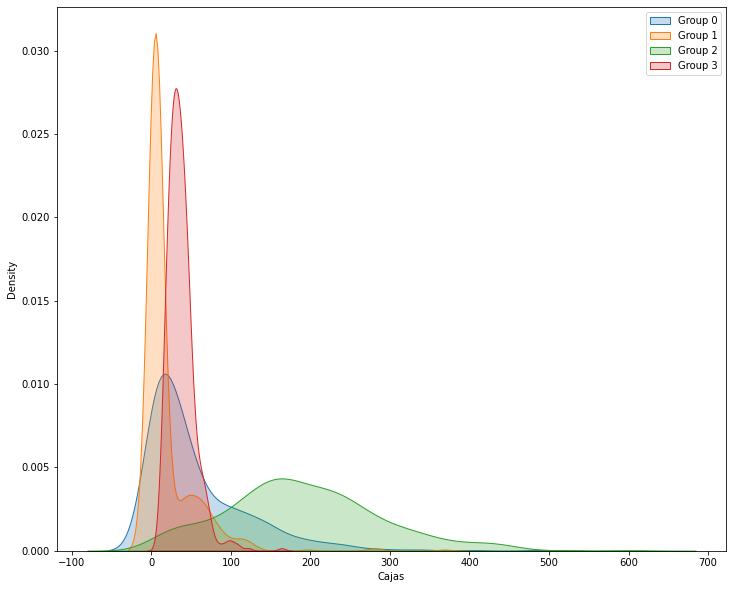

In [60]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot()

sns.kdeplot(data=group_0, x='Cajas', ax=ax, label="Group 0", shade=True)
sns.kdeplot(data=group_1, x='Cajas', ax=ax, label="Group 1", shade=True)
sns.kdeplot(data=group_2, x='Cajas', ax=ax, label="Group 2", shade=True)
sns.kdeplot(data=group_3, x='Cajas', ax=ax, label="Group 3", shade=True)
ax.legend();

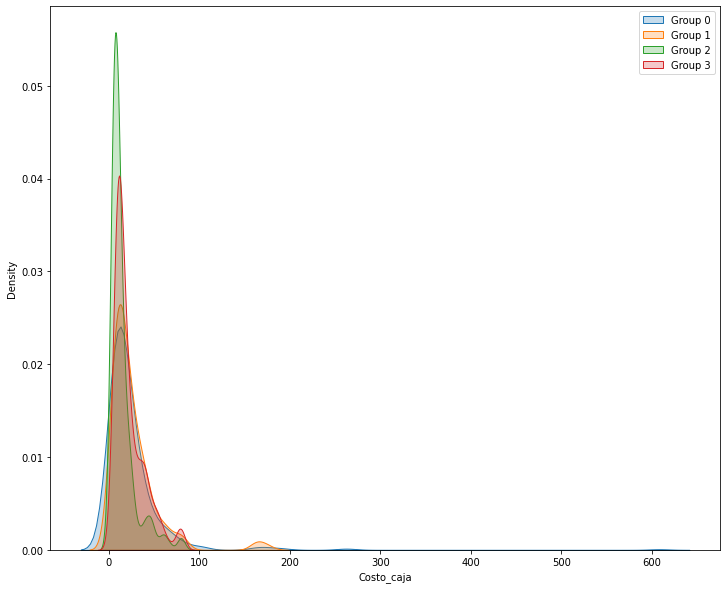

In [61]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot()

sns.kdeplot(data=group_0, x='Costo_caja', ax=ax, label="Group 0", shade=True)
sns.kdeplot(data=group_1, x='Costo_caja', ax=ax, label="Group 1", shade=True)
sns.kdeplot(data=group_2, x='Costo_caja', ax=ax, label="Group 2", shade=True)
sns.kdeplot(data=group_3, x='Costo_caja', ax=ax, label="Group 3", shade=True)
ax.legend();

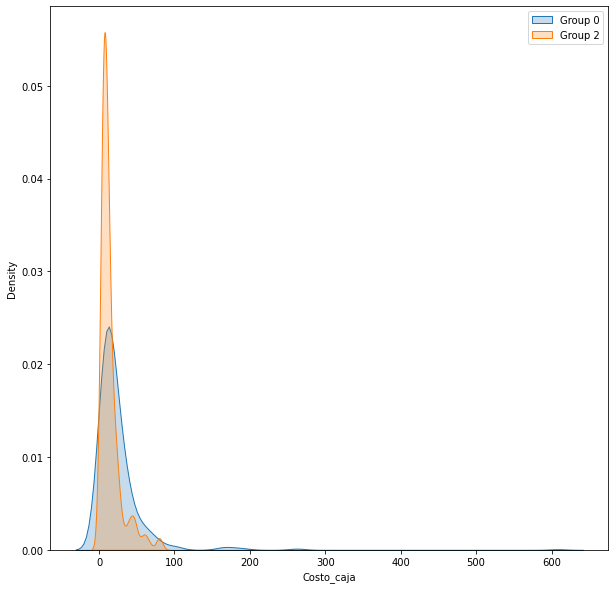

In [58]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

sns.kdeplot(data=group_0, x='Costo_caja', ax=ax, label="Group 0", shade=True)
sns.kdeplot(data=group_2, x='Costo_caja', ax=ax, label="Group 2", shade=True)
ax.legend();

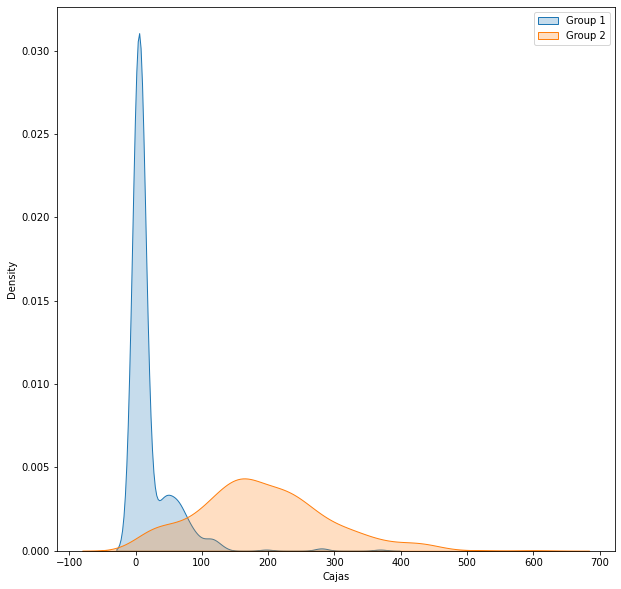

In [57]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

sns.kdeplot(data=group_1, x='Cajas', ax=ax, label="Group 1", shade=True)
sns.kdeplot(data=group_2, x='Cajas', ax=ax, label="Group 2", shade=True)
ax.legend();

In [62]:
import plotly.express as px

fig = px.scatter_3d(X, x='Cajas', y='Costo_caja', z='Group',
              color='Group')
fig.show()

# Método de CODO

In [63]:
inertia = []
for n in range(1, 11):
  model = KMeans(n_clusters=n, init="random", n_init=10, max_iter=300, algorithm="full")
  model.fit(X)
  inertia.append(model.inertia_)

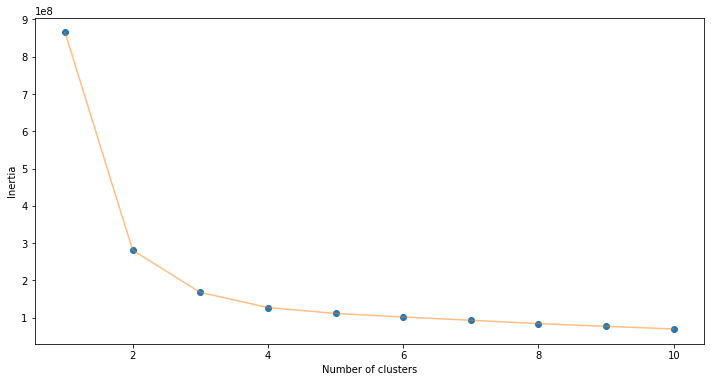

In [64]:
plt.figure(1, figsize=(12, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia");